## **Case study on unsupervised learning**

Try out different clustering models in the given dataset. Find the optimum
number of clusters in each model and create the model with optimum number of
clusters. Also learn about dB scan clustering and implement it
Please note the following:



## **Data:**

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

wine_clust = pd.read_csv('/content/Wine_clust .csv')

In [2]:
wine_clust.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_clust.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [4]:
wine_clust.shape

(178, 13)

In [5]:
wine_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
wine_clust.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
#set Alcohol as index
wine_clust=wine_clust.set_index('Alcohol')


In [8]:
wine_clust.value_counts()

Malic_Acid  Ash   Ash_Alcanity  Magnesium  Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue   OD280  Proline
0.74        2.50  21.0          88         2.48           2.01        0.42                  1.44             3.08             1.10  2.31   434        1
3.10        2.56  15.2          116        2.70           3.03        0.17                  1.66             5.10             0.96  3.36   845        1
2.40        2.42  20.0          96         2.90           2.79        0.32                  1.83             3.25             0.80  3.39   625        1
2.43        2.17  21.0          88         2.55           2.27        0.26                  1.22             2.00             0.90  2.78   325        1
2.45        2.46  21.0          98         2.56           2.11        0.34                  1.31             2.80             0.80  3.38   438        1
                                                                                             

In [9]:
wine_clust.describe()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Data Cleaning:

In [10]:
# Looking for duplicates
print('Number of duplicate observations in the dataset:', wine_clust.duplicated().sum())

Number of duplicate observations in the dataset: 0


In [11]:
# Looking for missing values
for col in wine_clust.columns:
    print('{} - missing Values: {}'.format(col, wine_clust[col].isnull().sum()))

Malic_Acid - missing Values: 0
Ash - missing Values: 0
Ash_Alcanity - missing Values: 0
Magnesium - missing Values: 0
Total_Phenols - missing Values: 0
Flavanoids - missing Values: 0
Nonflavanoid_Phenols - missing Values: 0
Proanthocyanins - missing Values: 0
Color_Intensity - missing Values: 0
Hue - missing Values: 0
OD280 - missing Values: 0
Proline - missing Values: 0


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Looking for outliers

#  visualizes outliers for a specific column (col) in the dataset using boxplot
def outlier_visualizer(col, vert=True, grid=True):
    wine_clust[col].plot(kind='box', vert=vert)
    plt.title('{} - Boxplot'.format(col))
    plt.ylabel('Values')
    plt.grid(grid)
    plt.show()

# identifies outliers for a specific column (col) using the Interquartile Range (IQR) method
def outlier_finder(col):
    q1 = np.percentile(wine_clust[col], 25)
    q3 = np.percentile(wine_clust[col], 75)
    iqr = q3 - q1
    left_lim = q1 - iqr*1.5
    right_lim = q3 + iqr*1.5
    outliers = {'Alcohol':[], col:[]}

    for i,c in enumerate(wine_clust[col]):
        if c < left_lim:
            outliers['Alcohol'].append(wine_clust[col].index[i])
            outliers[col].append(c)
        elif c > right_lim:
            outliers['Alcohol'].append(wine_clust[col].index[i])
            outliers[col].append(c)

    outliers_df = pd.DataFrame(outliers)
    outliers_df.set_index('Alcohol', inplace=True)

    print('{} - % of outliers: {}%'.format(col, round(outliers_df.shape[0]/wine_clust.shape[0]*100,2)))
    return outliers_df

  # it prints the percentage of outliers relative to the total number of alcohol in the dataset
  # and returns a DataFrame containing the alcohol and outlier values.

In [13]:
list=[ 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

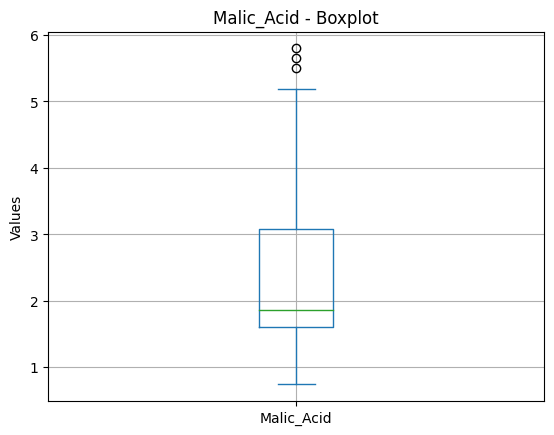

Malic_Acid - % of outliers: 1.69%


,Malic_Acid
Alcohol,
13.05,5.80
12.53,5.51
13.71,5.65


In [14]:
import seaborn as sns
outlier_visualizer('Malic_Acid')
outlier_finder('Malic_Acid')

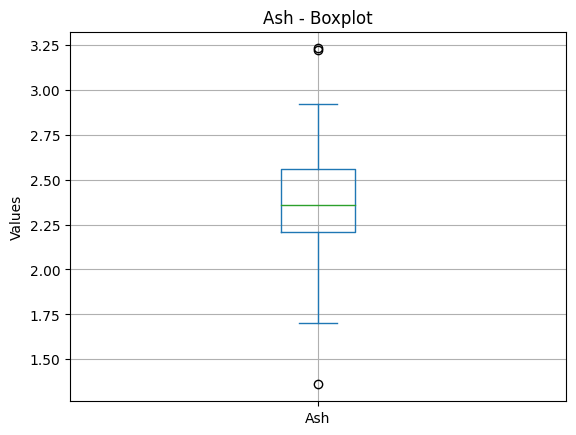

Ash - % of outliers: 1.69%


,Ash
Alcohol,
13.05,3.22
12.37,1.36
11.56,3.23


In [15]:
import seaborn as sns
outlier_visualizer('Ash')
outlier_finder('Ash')

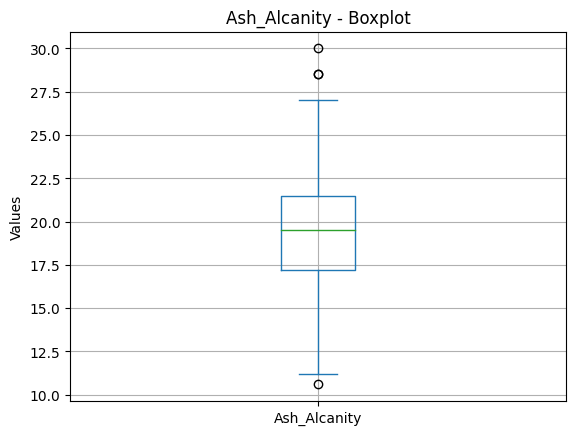

Ash_Alcanity - % of outliers: 2.25%


,Ash_Alcanity
Alcohol,
12.37,10.6
12.99,30.0
11.56,28.5
11.79,28.5


In [16]:
import seaborn as sns
outlier_visualizer('Ash_Alcanity')
outlier_finder('Ash_Alcanity')

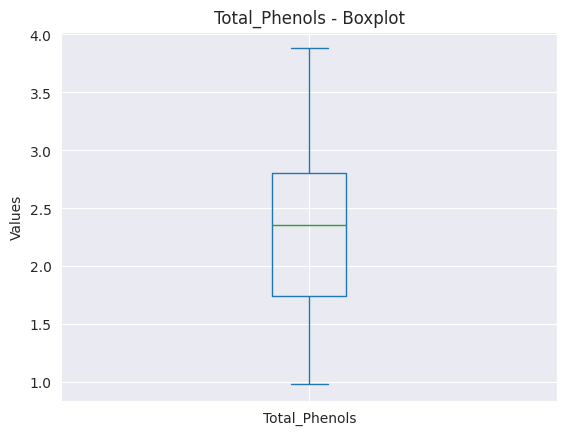

Total_Phenols - % of outliers: 0.0%


,Total_Phenols
Alcohol,


In [78]:
import seaborn as sns
outlier_visualizer('Total_Phenols')
outlier_finder('Total_Phenols')

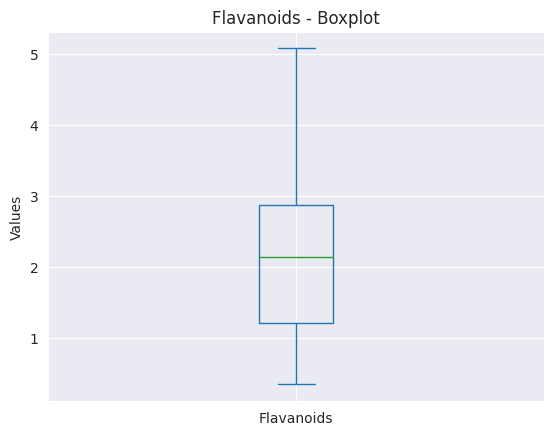

Flavanoids - % of outliers: 0.0%


,Flavanoids
Alcohol,


In [85]:
import seaborn as sns
outlier_visualizer('Flavanoids')
outlier_finder('Flavanoids')

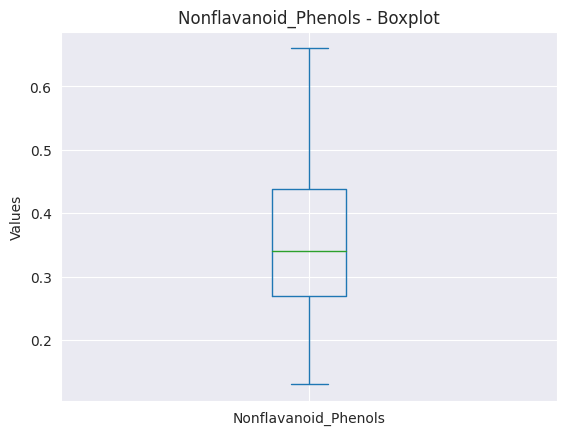

Nonflavanoid_Phenols - % of outliers: 0.0%


,Nonflavanoid_Phenols
Alcohol,


In [84]:
import seaborn as sns
outlier_visualizer('Nonflavanoid_Phenols')
outlier_finder('Nonflavanoid_Phenols')

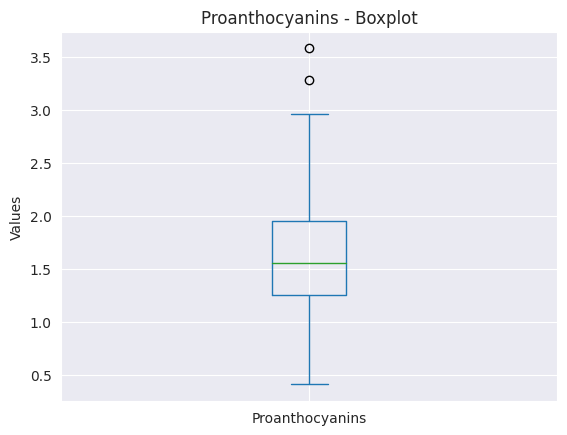

Proanthocyanins - % of outliers: 1.12%


,Proanthocyanins
Alcohol,
12.47,3.28
11.46,3.58


In [83]:
import seaborn as sns
outlier_visualizer('Proanthocyanins')
outlier_finder('Proanthocyanins')

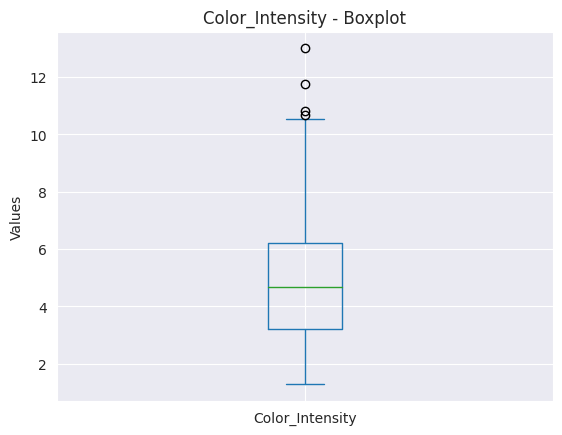

Color_Intensity - % of outliers: 2.25%


,Color_Intensity
Alcohol,
12.79,10.80
14.34,13.00
13.48,11.75
13.45,10.68


In [82]:
import seaborn as sns
outlier_visualizer('Color_Intensity')
outlier_finder('Color_Intensity')

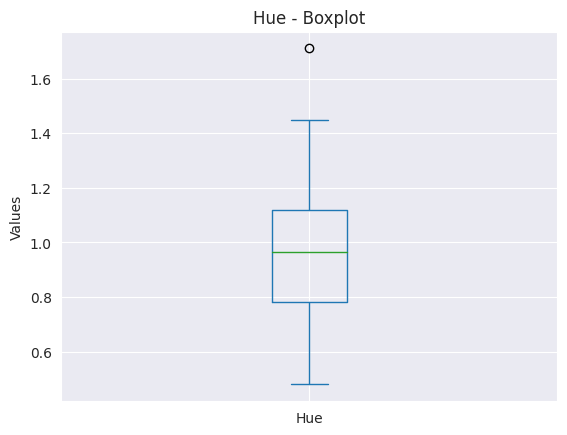

Hue - % of outliers: 0.56%


,Hue
Alcohol,
11.03,1.71


In [81]:
import seaborn as sns
outlier_visualizer('Hue')
outlier_finder('Hue')

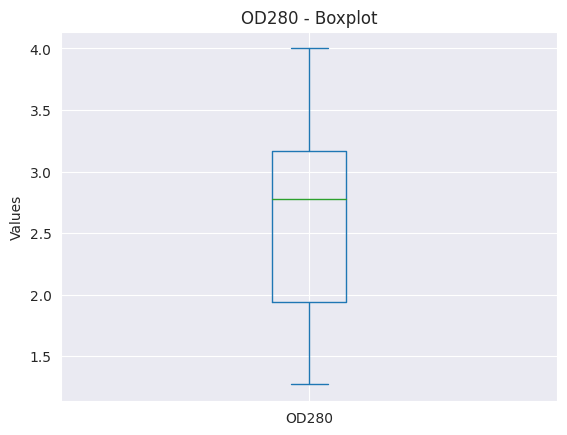

OD280 - % of outliers: 0.0%


,OD280
Alcohol,


In [80]:
import seaborn as sns
outlier_visualizer('OD280')
outlier_finder('OD280')

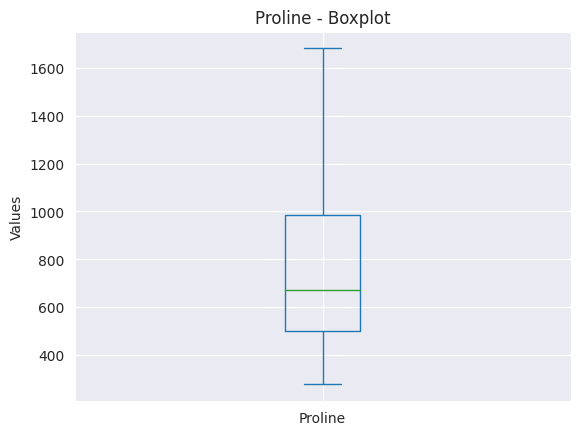

Proline - % of outliers: 0.0%


,Proline
Alcohol,


In [79]:
import seaborn as sns
outlier_visualizer('Proline')
outlier_finder('Proline')

As percentage of outliers are below 3% of the data for all features, we are not handling the outliers

# EDA:

In [17]:
wine_clust.describe(include='all')

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Some variables are on a very different scale; before modelling, I'll normalize the data to bring all variables on the same scale to avoid the features with the highest scale to dominate the clustering algorithms.

Let's look into the distribution and feature correlation of our data.

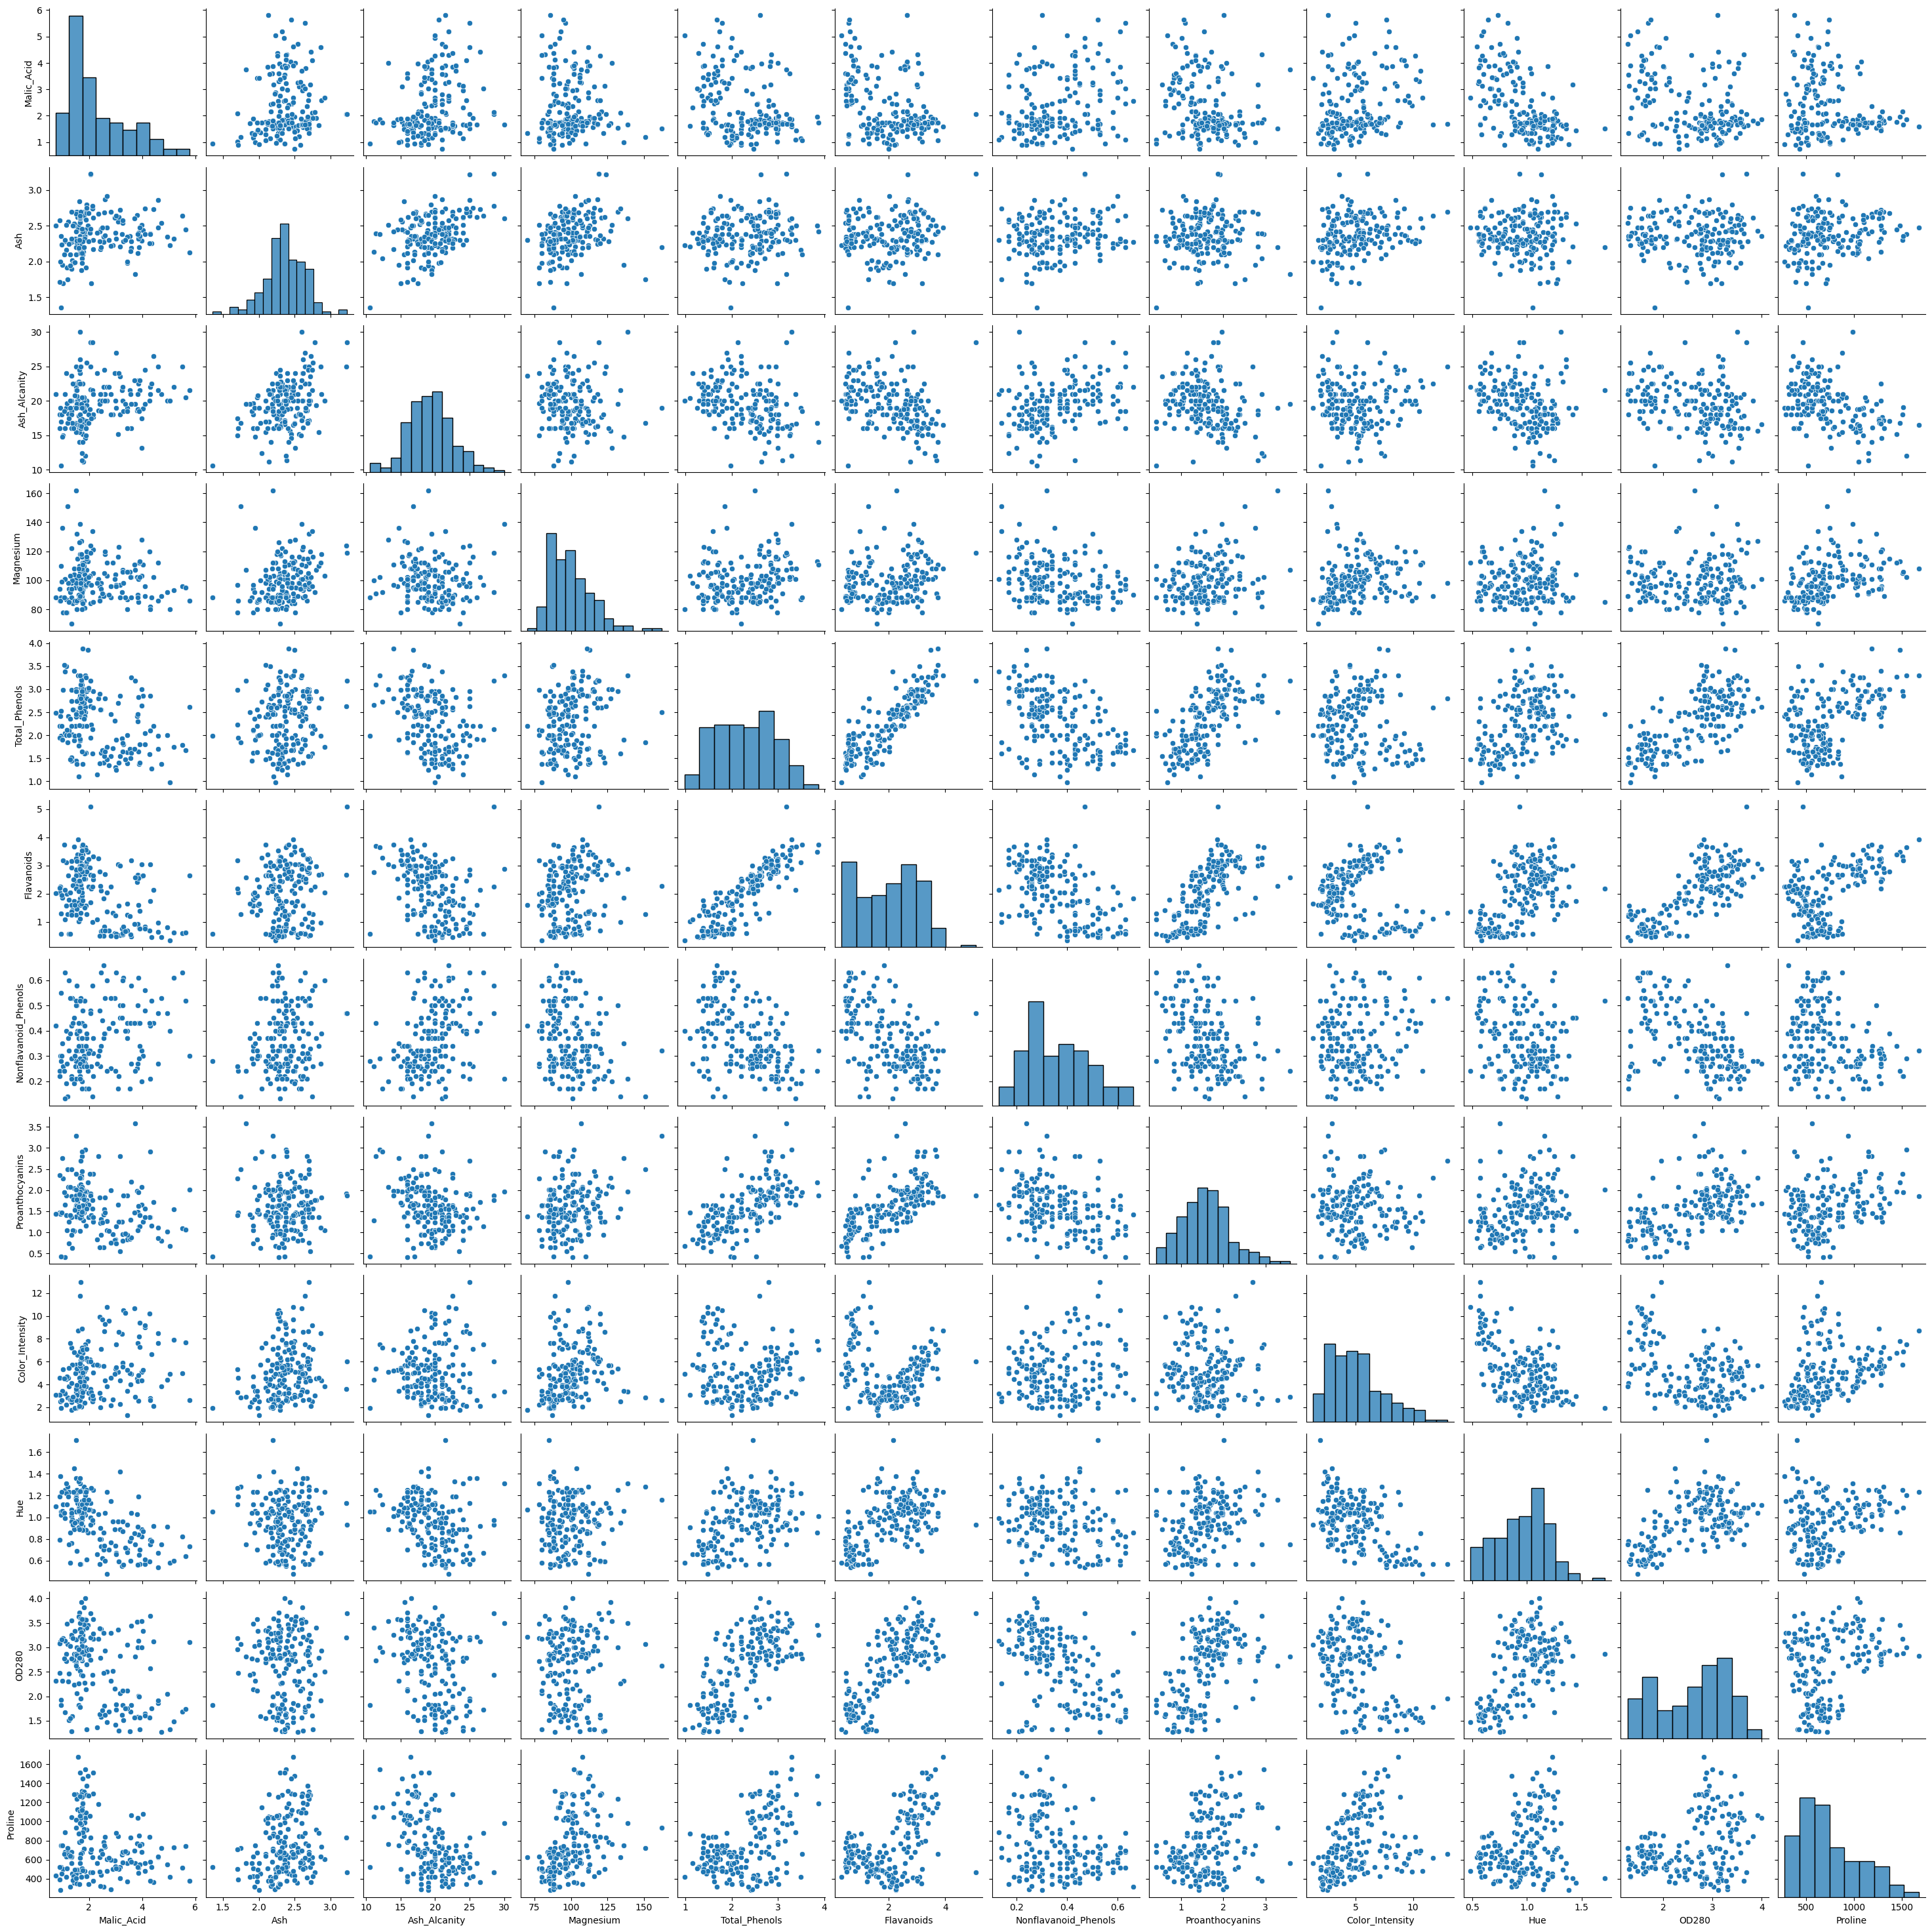

In [18]:
sns.pairplot(wine_clust)
plt.show()

In [19]:
# let's check variable skewness
wine_clust.skew()

Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

Malic_Acid ,Magnesium   ,Color_Intensity,Proline shows symmetric distribution

Ash,OD280 shows left skewed distribution

all others show right skewed distribution

In [20]:
wine_clust.corr()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Malic_Acid,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100
Hue,-0.561296,-0.074667,-0.273955,0.055398,0.433681,0.543479,-0.262640,0.295544,-0.521813,1.000000,0.565468,0.236183


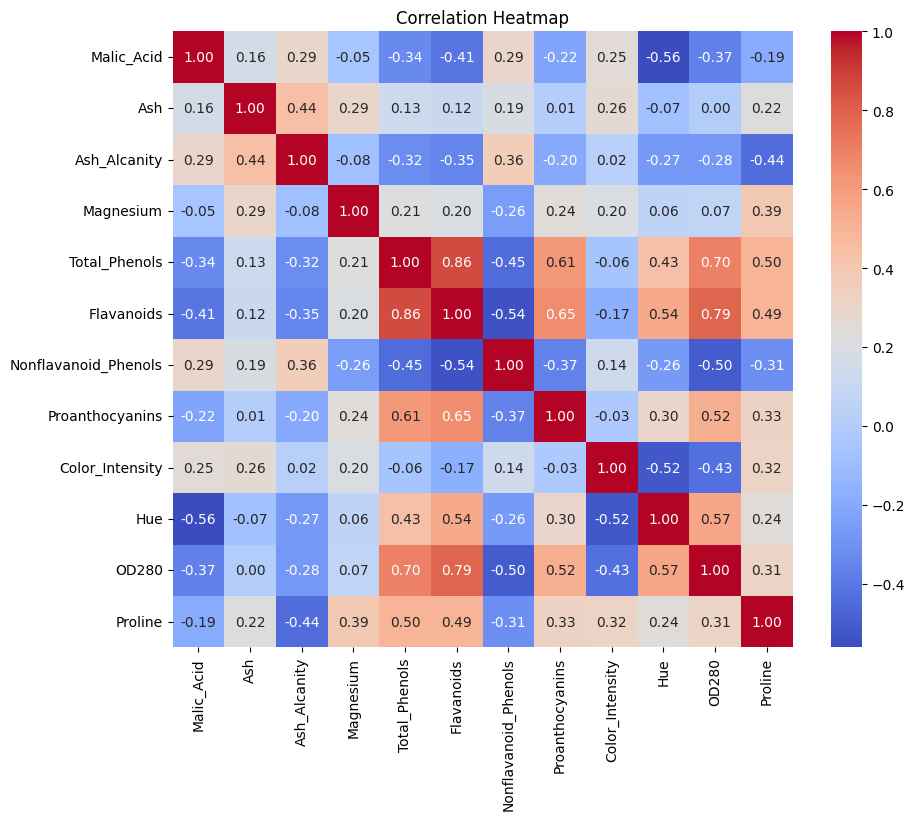

In [21]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wine_clust.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [75]:
def corr_matrix(data):
    corr_matrix = data.corr()

    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if (abs(x) > 0.70 and abs(x) < 1) or( abs(x)<-.7 and abs(x)>-1) else '')

    return corr_matrix

In [76]:
corr_matrix(wine_clust)

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Malic_Acid,,,,,,,,,,,,
Ash,,,,,,,,,,,,
Ash_Alcanity,,,,,,,,,,,,
Magnesium,,,,,,,,,,,,
Total_Phenols,,,,,,0.864564,,,,,,
Flavanoids,,,,,0.864564,,,,,,0.787194,
Nonflavanoid_Phenols,,,,,,,,,,,,
Proanthocyanins,,,,,,,,,,,,
Color_Intensity,,,,,,,,,,,,
Hue,,,,,,,,,,,,


Strong correlation exists between

1.Flavanoids and Total_Phenols

2.OD280 and Flavanoids

3.Total_Phenols and  Flavanoids

## **Transfromation**
Assuming all distributionsa are normal no transformations are applied on data

###  **Feature Scaling**

In [24]:
wine_clust.describe()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


 Features are on different scales
I'll scale the data using Z-Score Normalization.

In [25]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_ds = scaler.fit_transform(wine_clust)



# Model Development

In [26]:
# import the libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## **A. K-means**

Let's fit a K-Means algorithm, fitting the model on a number of clusters that goes from 2 to 10.
* We use k-means++ as a smarter initialization method.
* We record the Inertia and the Distortion for each K-value, and plot the number of clusters vs the error, applying the elbow rule to choose the optimum number of clusters.

- Inertia is defined as: the sum of the intracluster distances where an intracluster distance is the sum of squared distances from each point to its cluster centroid.
- Distortion is defined as: the average of the mean squared distance from each point to the centroid of the respective clusters (we create a function, the distortion_function(), to calculate the Distortion).


In [27]:
import pandas as pd
from sklearn.cluster import KMeans

def distortion_function(k, dataset, init='k-means++', random_state=98):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(dataset)
    dist_matrix = pd.DataFrame(columns=['Cluster', 'Distance'])
    for x in range(len(dataset)):
        new_row = pd.DataFrame({'Cluster': [km.labels_[x]],
                                'Distance': [((dataset[x] - km.cluster_centers_[km.labels_[x]])**2).sum()]})
        dist_matrix = pd.concat([dist_matrix, new_row], ignore_index=True)
    distortion = (dist_matrix.groupby(['Cluster']).mean()).mean()[0]
    return distortion

inertia = []
distortion = []
silhouette = []

for k in range(2, 11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(scaled_ds)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=scaled_ds))
    silhouette.append(silhouette_score(scaled_ds, km.labels_))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [28]:
inertia = []
distortion = []
silhouette = []

for k in range(2, 11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(scaled_ds)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=scaled_ds))
    silhouette.append(silhouette_score(scaled_ds, km.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Evaluating the Elbow graph

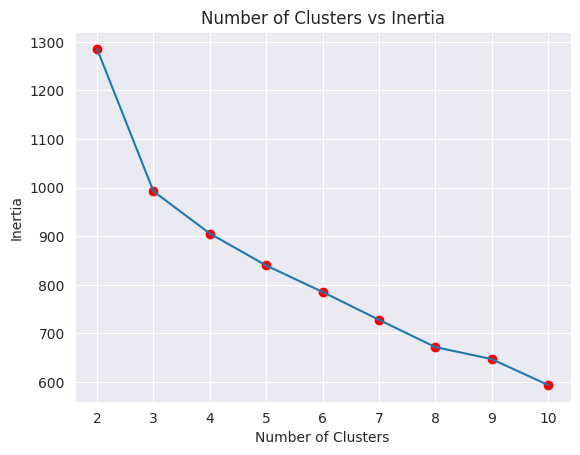

In [77]:
#plt.figure(figsize=(8,5.5))
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
#plt.xticks(ticks=range(2,11), labels=range(2,11))
plt.grid(True)
plt.show()

### 2. Using Principal Component Analysis


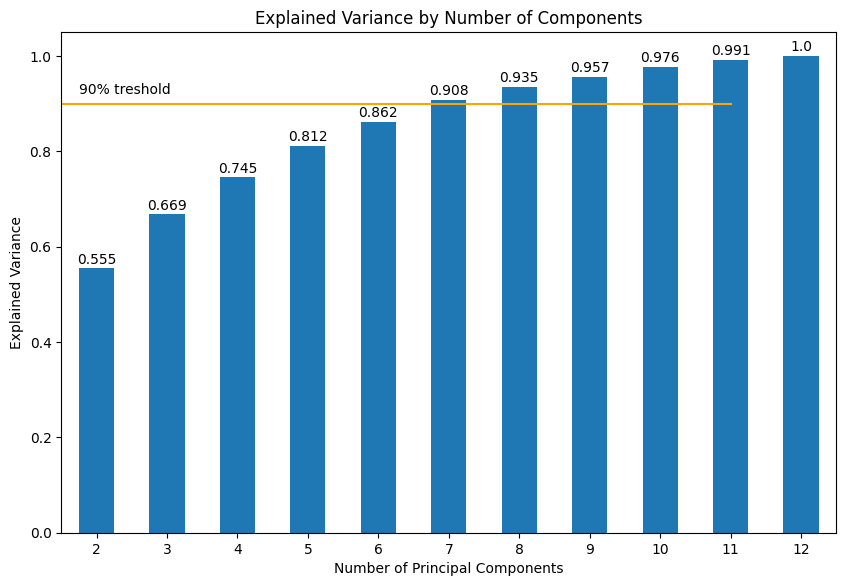

In [30]:
expl_var = {'N_components':[], 'Explained Variance':[]}

for p in range(2,13):
    pca = PCA(n_components=p)
    pca_data = pca.fit_transform(scaled_ds)
    expl_var['N_components'].append(p)
    expl_var['Explained Variance'].append(pca.explained_variance_ratio_.sum())


expl_var = pd.DataFrame(expl_var)
barchart = expl_var.plot(x='N_components', y='Explained Variance', kind='bar',figsize=(10,6.5), legend=False)
for i in barchart.patches:
    barchart.annotate(round(i.get_height(),3), # get the frequency of the variable categories
                      xy = (i.get_x() + i.get_width()/2, i.get_height()*1.005), # set the coordinates for each label
                      ha='center', # set the horizontal alignment
                      va='top', # set the vertical alignment
                      xytext=(0,10), # default
                      textcoords='offset points', # default
                      fontsize=10) # set the font size
plt.plot(range(-1,10), np.full((11,), 0.9), color='orange')
plt.text(-0.25, 0.92, '90% treshold')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

If we reduce the dimensionality from 12 features to 7 components, we still can maintain more than 90% of the original variance. I choose 7 as number of new components, and retrain the k-means algorithm on the dimension-reduced dataset

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


def distortion_function(k, dataset, init='k-means++', random_state=98):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(dataset)
    dist_matrix = pd.DataFrame(columns=['Cluster', 'Distance'])
    for x in range(len(dataset)):
        dist_matrix = pd.concat([dist_matrix, pd.DataFrame({'Cluster': [km.labels_[x]],
                                                            'Distance': [((dataset[x] - km.cluster_centers_[km.labels_[x]])**2).sum()]})])
    distortion = (dist_matrix.groupby(['Cluster']).mean()).mean()[0]
    return distortion

pca = PCA(n_components=7)
pca_data = pca.fit_transform(scaled_ds)

inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=pca_data))
    silhouette.append(silhouette_score(pca_data, km.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Evaluating the Elbow graph

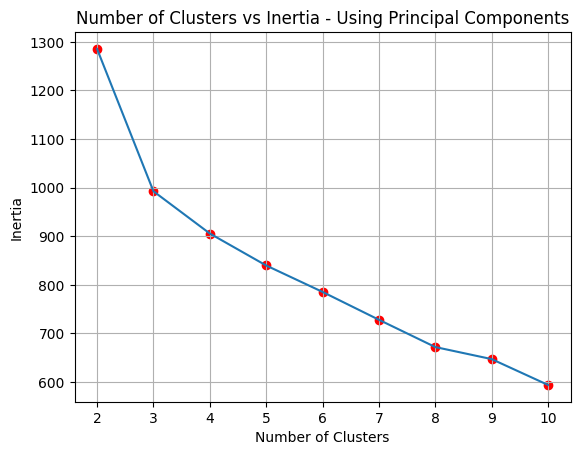

In [32]:
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia - Using Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

 I'll check the Silhouette Score of both models (original number of features vs PCA) to test which one performed better.

In [33]:
silhouette={'Dataset':[], 'Silhouette_Score':[]}
km = KMeans(init='k-means++', n_clusters=3, random_state=98)
km.fit(scaled_ds)

silhouette['Dataset'].append('Original number of features')
silhouette['Silhouette_Score'].append(silhouette_score(scaled_ds, km.labels_))
km.fit(pca_data)
silhouette['Dataset'].append('PCA')
silhouette['Silhouette_Score'].append(silhouette_score(pca_data, km.labels_))
pd.DataFrame(silhouette['Silhouette_Score'], index=silhouette['Dataset'], columns=['Silhouette_Score'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Silhouette_Score
Original number of features,0.266186
PCA,0.297227


Slight higher performance for pca. So we are using pca_data from this line

In [34]:

y_kmeans=km.fit_predict(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

# **Visualising the clusters**

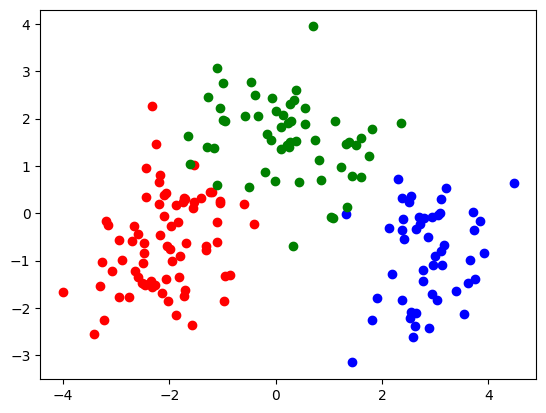

In [36]:
plt.scatter(pca_data[y_kmeans==0,0],pca_data[y_kmeans==0,1],c='red',label='Cluster1')
plt.scatter(pca_data[y_kmeans==1,0],pca_data[y_kmeans==1,1],c='blue',label='Cluster2')
plt.scatter(pca_data[y_kmeans==2,0],pca_data[y_kmeans==2,1],c='green',label='Cluster3')

In [37]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(pca_data,y_kmeans)

In [38]:
print(sil)

0.29722671628063746


## B. **Agglomerative clustering**

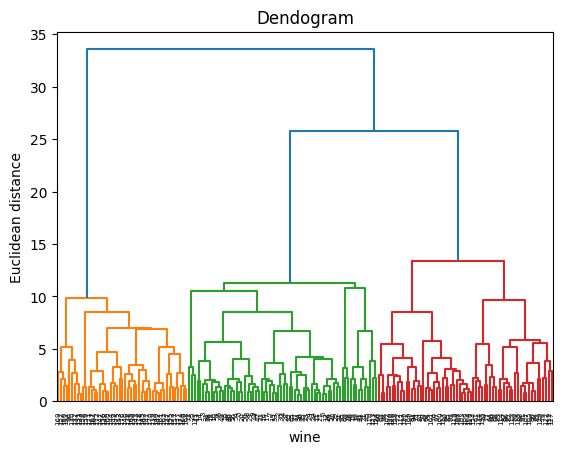

In [39]:
#Optimum no of clusters using dendograms
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(pca_data,method='ward'))
plt.title('Dendogram')
plt.xlabel('wine')
plt.ylabel('Euclidean distance')
#plt.axhline()
plt.show()

In [40]:
import sklearn
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(pca_data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [41]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

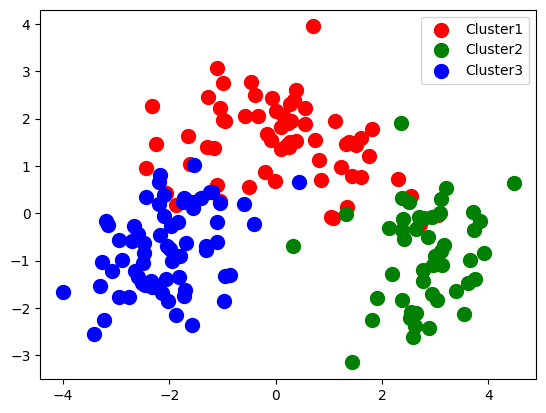

In [42]:
plt.scatter(pca_data[y_hc==0,0],pca_data[y_hc==0,1],s=100,c='red',label='Cluster1')
plt.scatter(pca_data[y_hc==1,0],pca_data[y_hc==1,1],s=100,c='green',label='Cluster2')
plt.scatter(pca_data[y_hc==2,0],pca_data[y_hc==2,1],s=100,c='blue',label='Cluster3')

plt.legend()
plt.show()


In [43]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(pca_data,y_hc)

In [44]:
print(sil)

0.274224291174489


## C. **DB scan clustering**

Deciding Optimal value for epsilon¶
Plot different combinations of 𝑒𝑝𝑠𝑖𝑙𝑜𝑛 and 𝑚𝑖𝑛𝑃𝑡𝑠

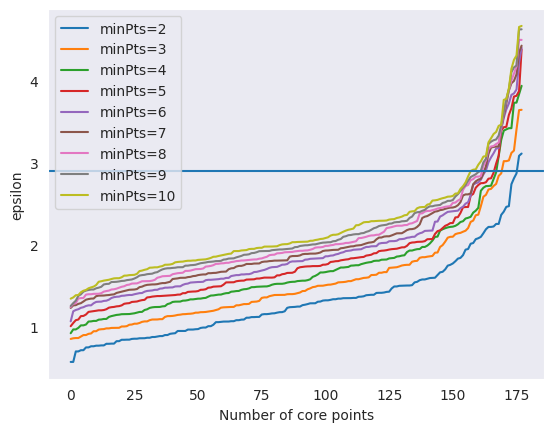

In [70]:
from sklearn.neighbors import NearestNeighbors

# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(pca_data)
distances, indices = nbrs.kneighbors(pca_data)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(2.9)

plt.legend()
plt.show()

In [64]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=2).fit(pca_data)
clusters = db.labels_



len(set(clusters))



3

In [61]:
clusters


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [54]:
s = silhouette_score(pca_data,clusters)
print(s)

0.22510968471796527


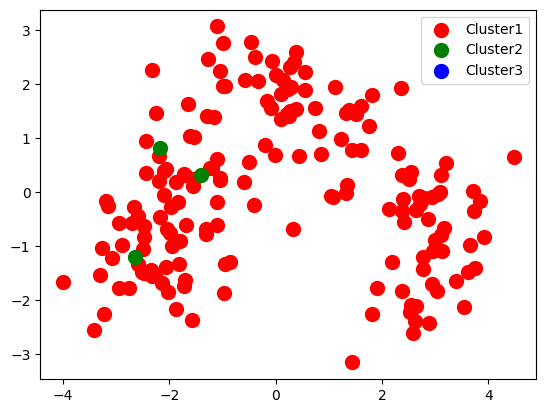

In [65]:
plt.scatter(pca_data[clusters==0,0],pca_data[clusters==0,1],s=100,c='red',label='Cluster1')
plt.scatter(pca_data[clusters==1,0],pca_data[clusters==1,1],s=100,c='green',label='Cluster2')
plt.scatter(pca_data[clusters==2,0],pca_data[clusters==2,1],s=100,c='blue',label='Cluster3')

plt.legend()
plt.show()


A single large cluster is formed and a weak silhouette_score due to equivalent densities across the regions which makes separation challenging.

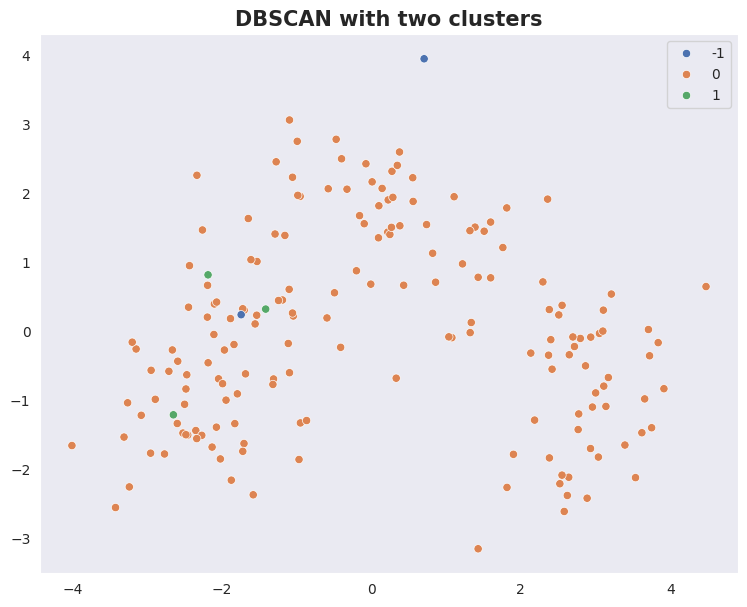

In [68]:
sns.set_style('dark')
plt.figure(figsize=(9,7))
sns.scatterplot(hue=db.labels_, x=pca_data[:,0], y=pca_data[:,1],palette="deep")
plt.title("DBSCAN with two clusters",fontsize=15,fontweight="bold")
plt.show()

## **Conclusion:**

The modelling is done in KMeans, Agglomerative clustering and DBSCAN method.
The slightly higher silhouette_score is noted for KMeans method of 0.29. But the value is not adquate to conclude the good clustering.